## Dataset: Penguins vs Turtles
* Source: https://www.kaggle.com/datasets/abbymorgan/penguins-vs-turtles

## Import Tools

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import shutil
from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, GlobalAveragePooling2D
from keras.applications import EfficientNetB4

In [2]:
import urllib
url = "https://raw.githubusercontent.com/Jwizzed/ml-journey/main/myTool.py"
file_name = "myTool.py"
urllib.request.urlretrieve(url, file_name)

('myTool.py', <http.client.HTTPMessage at 0x28910a440>)

In [3]:
from myTool import unzip, report_dir, compare_results_df, get_lines, view_random_image, evaluate_preds

## Get the data

In [4]:
!kaggle datasets download -d abbymorgan/penguins-vs-turtles

 92%|██████████████████████████████████▉   | 19.0M/20.7M [00:02<00:00, 16.6MB/s]
100%|██████████████████████████████████████| 20.7M/20.7M [00:02<00:00, 9.56MB/s]


In [5]:
unzip("penguins-vs-turtles.zip")

In [6]:
!ls

Penguins vs Turtles.ipynb penguins-vs-turtles.zip   valid
__pycache__               train                     valid_annotations
myTool.py                 train_annotations


In [7]:
report_dir("valid")

*********************************************************
In valid
Has 1 folder(s): ['valid'] 
0 file(s): []
*********************************************************
In valid/valid
Has 0 folder(s): [] 
72 file(s): ['image_id_066.jpg', 'image_id_067.jpg', 'image_id_071.jpg', 'image_id_065.jpg', 'image_id_059.jpg', 'image_id_058.jpg', 'image_id_064.jpg', 'image_id_070.jpg', 'image_id_048.jpg', 'image_id_060.jpg', 'image_id_061.jpg', 'image_id_049.jpg', 'image_id_063.jpg', 'image_id_062.jpg', 'image_id_005.jpg', 'image_id_011.jpg', 'image_id_039.jpg', 'image_id_038.jpg', 'image_id_010.jpg', 'image_id_004.jpg', 'image_id_012.jpg', 'image_id_006.jpg', 'image_id_007.jpg', 'image_id_013.jpg', 'image_id_017.jpg', 'image_id_003.jpg', 'image_id_002.jpg', 'image_id_016.jpg', 'image_id_028.jpg', 'image_id_000.jpg', 'image_id_014.jpg', 'image_id_015.jpg', 'image_id_001.jpg', 'image_id_029.jpg', 'image_id_024.jpg', 'image_id_030.jpg', 'image_id_018.jpg', 'image_id_019.jpg', 'image_id_031.jpg', 'ima

### Get the images

Image shape: (640, 640, 3)


array([[[ 42,  48,  46],
        [ 34,  40,  38],
        [ 29,  35,  33],
        ...,
        [ 36,  36,  36],
        [ 32,  32,  32],
        [ 30,  30,  30]],

       [[ 46,  52,  50],
        [ 39,  45,  43],
        [ 38,  44,  42],
        ...,
        [ 32,  32,  32],
        [ 31,  31,  31],
        [ 31,  31,  31]],

       [[ 53,  59,  57],
        [ 52,  58,  56],
        [ 61,  67,  65],
        ...,
        [ 31,  31,  31],
        [ 31,  31,  31],
        [ 32,  32,  32]],

       ...,

       [[ 76,  78,  65],
        [ 76,  78,  65],
        [ 75,  77,  64],
        ...,
        [143, 146, 139],
        [145, 147, 142],
        [145, 150, 144]],

       [[ 76,  78,  65],
        [ 76,  78,  65],
        [ 76,  78,  65],
        ...,
        [146, 148, 143],
        [148, 153, 149],
        [151, 157, 153]],

       [[ 76,  78,  65],
        [ 77,  79,  66],
        [ 77,  79,  66],
        ...,
        [145, 150, 146],
        [151, 155, 154],
        [155, 161, 159]]

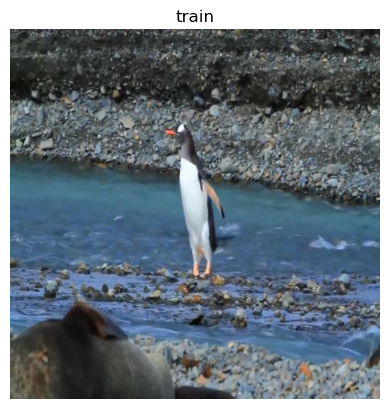

In [8]:
# Plot the random image
view_random_image(target_dir="train/", target_class="train")

In [9]:
train_image = sorted(os.listdir("train/train"))
val_image = sorted(os.listdir("valid/valid"))
len(train_image), train_image[:5]

(500,
 ['image_id_000.jpg',
  'image_id_001.jpg',
  'image_id_002.jpg',
  'image_id_003.jpg',
  'image_id_004.jpg'])

In [10]:
len(val_image), val_image[:5]

(72,
 ['image_id_000.jpg',
  'image_id_001.jpg',
  'image_id_002.jpg',
  'image_id_003.jpg',
  'image_id_004.jpg'])

### Get the image labels

In [11]:
train_label = eval(get_lines("train_annotations")[0])
len(train_label), train_label[:2]

(500,
 [{'id': 0,
   'image_id': 0,
   'category_id': 1,
   'bbox': [119, 25, 205, 606],
   'area': 124230,
   'segmentation': [],
   'iscrowd': 0},
  {'id': 1,
   'image_id': 1,
   'category_id': 1,
   'bbox': [131, 82, 327, 440],
   'area': 143880,
   'segmentation': [],
   'iscrowd': 0}])

In [12]:
val_label = eval(get_lines("valid_annotations")[0])
len(val_label), val_label[:2]

(72,
 [{'id': 0,
   'image_id': 0,
   'category_id': 1,
   'bbox': [227, 93, 298, 525],
   'area': 156450,
   'segmentation': [],
   'iscrowd': 0},
  {'id': 1,
   'image_id': 1,
   'category_id': 2,
   'bbox': [211, 198, 428, 259],
   'area': 110852,
   'segmentation': [],
   'iscrowd': 0}])

### Combine image and label

In [13]:
comb_train = {}
comb_val = {}

for i in range(len(train_image)):
    comb_train[train_image[i]] = train_label[i]["category_id"]

for i in range(len(val_image)):
    comb_val[val_image[i]] = val_label[i]["category_id"]
    
train_df = pd.DataFrame.from_dict(comb_train, orient='index', columns=['label']).reset_index()
train_df.rename(columns={"index":"image_path"}, inplace=True)

val_df = pd.DataFrame.from_dict(comb_val, orient='index', columns=['label']).reset_index()
val_df.rename(columns={"index":"image_path"}, inplace=True)

train_df.head()

,image_path,label
0,image_id_000.jpg,1
1,image_id_001.jpg,1
2,image_id_002.jpg,2
3,image_id_003.jpg,2
4,image_id_004.jpg,1


In [14]:
val_df.head()

,image_path,label
0,image_id_000.jpg,1
1,image_id_001.jpg,2
2,image_id_002.jpg,2
3,image_id_003.jpg,1
4,image_id_004.jpg,1


Since the image and label is seperate, I'll make it to be in this format:
- train
  - penguins
  - turtles
- valid
  - penguins
  - turtles

In [15]:
# Create folders
os.makedirs("train/penguins")
os.makedirs("train/turtles")
os.makedirs("valid/penguins")
os.makedirs("valid/turtles")

In [16]:
# from_dir = 
class_names = ["penguins", "turtles"]
dfs = [train_df, val_df]

for df in dfs:
    current_dir = ""
    if len(df) == len(train_df):
        current_dir = "train"
    else:
        current_dir = "valid"
        
    for path, label in df.values:
        if label == 2:
            shutil.move(f"{current_dir}/{current_dir}/" + path, f"{current_dir}/turtles/" + path)
        else:
            shutil.move(f"{current_dir}/{current_dir}/" + path, f"{current_dir}/penguins/" + path)
    shutil.rmtree(f"{current_dir}/{current_dir}")

## Preprocess

In [17]:
train_dir = "train"
val_dir = "valid"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [18]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="binary",
                                                                            batch_size=BATCH_SIZE) 
val_data = tf.keras.preprocessing.image_dataset_from_directory(directory=val_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="binary")

Found 500 files belonging to 2 classes.
Found 72 files belonging to 2 classes.


In [19]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

## Model

### Making my own model (Baseline)

In [20]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])



model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.legacy.Adam(),
              metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data=val_data,
                        validation_steps=len(val_data))


Epoch 1/20


2023-07-09 13:12:08.764892: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


16/16 [==============================] - 4s 180ms/step - loss: 493.1919 - accuracy: 0.5160 - val_loss: 130.9582 - val_accuracy: 0.5000
Epoch 2/20
16/16 [==============================] - 3s 162ms/step - loss: 70.0960 - accuracy: 0.4640 - val_loss: 30.7405 - val_accuracy: 0.5000
Epoch 3/20
16/16 [==============================] - 3s 162ms/step - loss: 28.9815 - accuracy: 0.5260 - val_loss: 4.1053 - val_accuracy: 0.4722
Epoch 4/20
16/16 [==============================] - 3s 190ms/step - loss: 1.8977 - accuracy: 0.6040 - val_loss: 2.5356 - val_accuracy: 0.5833
Epoch 5/20
16/16 [==============================] - 4s 196ms/step - loss: 3.7366 - accuracy: 0.6700 - val_loss: 1.8392 - val_accuracy: 0.7361
Epoch 6/20
16/16 [==============================] - 4s 193ms/step - loss: 1.1918 - accuracy: 0.7720 - val_loss: 10.8223 - val_accuracy: 0.7500
Epoch 7/20
16/16 [==============================] - 3s 191ms/step - loss: 1.0809 - accuracy: 0.8080 - val_loss: 2.3533 - val_accuracy: 0.6111
Epoch 8/2

In [21]:
result_1 = model_1.evaluate(val_data)
result_1

3/3 [==============================] - 0s 36ms/step - loss: 127.8282 - accuracy: 0.7500


[127.82815551757812, 0.75]

<Axes: >

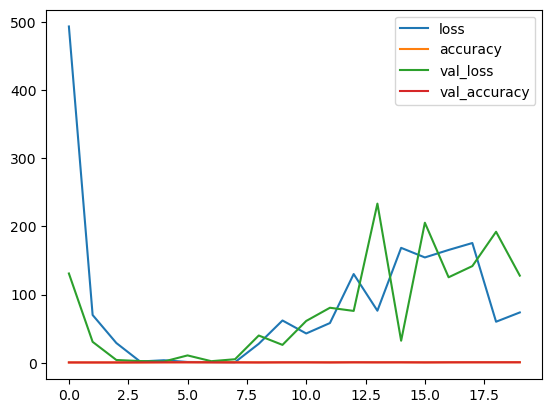

In [22]:
pd.DataFrame(history_1.history).plot()

### EfficientNetB0

In [23]:
data_augmentation = keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomHeight(0.2),
  tf.keras.layers.RandomWidth(0.2),
], name ="data_augmentation")

In [24]:
base_model = EfficientNetB4(include_top=False, weights="imagenet")
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-15]:
  layer.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs)
x = base_model(inputs)
x = GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
x = Dropout(0.4)(x)
x = Flatten()(x)
x = BatchNormalization(axis=-1)(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(1, activation="sigmoid", name="output_layer")(x)
model_3 = tf.keras.Model(inputs, outputs)


model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

In [25]:
history_3 = model_3.fit(train_data,
                        epochs=10,
                        batch_size=32,
                        steps_per_epoch=len(train_data),
                        validation_data=val_data,
                        validation_steps=len(val_data),
                        callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=7, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, verbose=1)])
                       

Epoch 1/10
16/16 [==============================] - 39s 2s/step - loss: 0.2923 - accuracy: 0.8780 - val_loss: 0.1735 - val_accuracy: 0.9583 - lr: 1.0000e-04
Epoch 2/10
16/16 [==============================] - 17s 1s/step - loss: 0.0689 - accuracy: 0.9720 - val_loss: 0.1148 - val_accuracy: 0.9722 - lr: 1.0000e-04
Epoch 3/10
16/16 [==============================] - 18s 1s/step - loss: 0.0673 - accuracy: 0.9680 - val_loss: 0.0905 - val_accuracy: 0.9722 - lr: 1.0000e-04
Epoch 4/10
16/16 [==============================] - 20s 1s/step - loss: 0.0271 - accuracy: 0.9840 - val_loss: 0.0783 - val_accuracy: 0.9722 - lr: 1.0000e-04
Epoch 5/10
16/16 [==============================] - 20s 1s/step - loss: 0.0212 - accuracy: 0.9900 - val_loss: 0.0686 - val_accuracy: 0.9722 - lr: 1.0000e-04
Epoch 6/10
16/16 [==============================] - 19s 1s/step - loss: 0.0507 - accuracy: 0.9760 - val_loss: 0.0605 - val_accuracy: 0.9722 - lr: 1.0000e-04
Epoch 7/10
16/16 [==============================] - 20s 1s

In [26]:
result_3 = model_3.evaluate(val_data)
result_3

3/3 [==============================] - 2s 428ms/step - loss: 0.0554 - accuracy: 0.9861


[0.055413052439689636, 0.9861111044883728]

<Axes: >

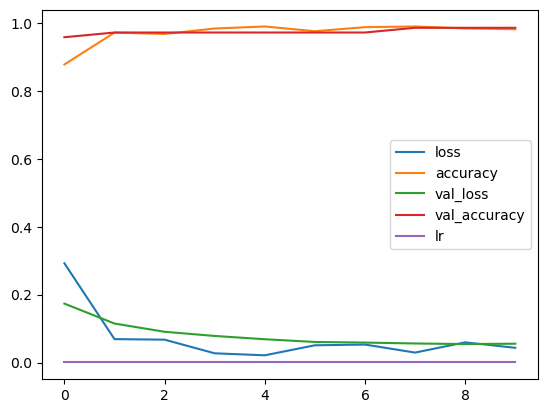

In [27]:
pd.DataFrame(history_3.history).plot()

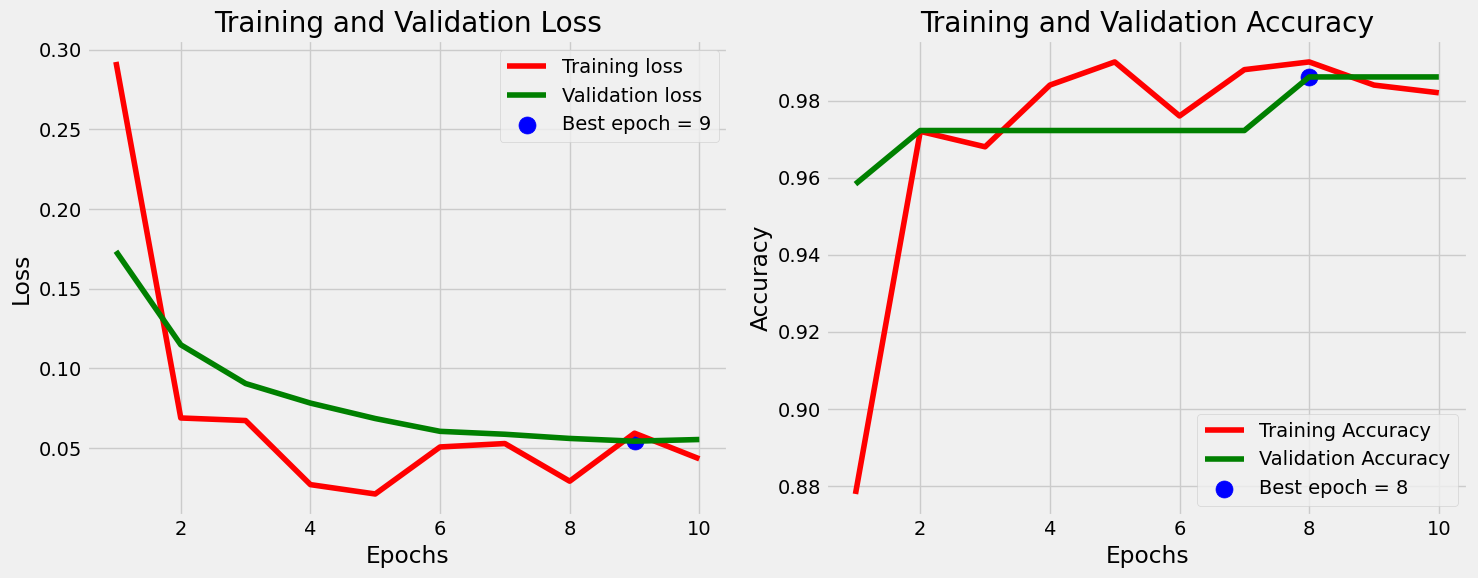

In [28]:
def history_plot(model_history):
    """
    Plots model history of accuracy and loss over time
    :param model_history: History object containing training/validation metrics
    :return: None
    **Note: Modified from someone in this dataset's notebook.
    """
    tacc = model_history.history['accuracy']
    tloss = model_history.history['loss']
    vacc = model_history.history['val_accuracy']
    vloss = model_history.history['val_loss']

    epochs = np.arange(1, len(tacc) + 1)

    index_loss = np.argmin(vloss)
    val_lowest = vloss[index_loss]
    index_acc = np.argmax(vacc)
    acc_highest = vacc[index_acc]

    plt.style.use('fivethirtyeight')
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    axes[0].plot(epochs, tloss, 'r', label='Training loss')
    axes[0].plot(epochs, vloss, 'g', label='Validation loss')
    axes[0].scatter(index_loss + 1, val_lowest, s=150, c='blue', label=f'Best epoch = {index_loss + 1}')
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()

    axes[1].plot(epochs, tacc, 'r', label='Training Accuracy')
    axes[1].plot(epochs, vacc, 'g', label='Validation Accuracy')
    axes[1].scatter(index_acc + 1, acc_highest, s=150, c='blue', label=f'Best epoch = {index_acc + 1}')
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

history_plot(history_3)